In [6]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
schools = pd.read_csv("schools.csv")
print(schools.head())

   index                                        school_name    borough  \
0      0  New Explorations into Science, Technology and ...  Manhattan   
1      1                               Essex Street Academy  Manhattan   
2      2                       Lower Manhattan Arts Academy  Manhattan   
3      3    High School for Dual Language and Asian Studies  Manhattan   
4      4      Henry Street School for International Studies  Manhattan   

  building_code  average_math  average_reading  average_writing  \
0          M022           657              601              601   
1          M445           395              411              387   
2          M445           418              428              415   
3          M445           613              453              463   
4          M056           410              406              381   

   percent_tested  
0             NaN  
1            78.9  
2            65.1  
3            95.9  
4            59.7  


In [7]:
# Find Best Math Performing Schools
threshold = 0.8 * 800  # 80% of max math score
best_math_schools = schools[schools["average_math"] >= threshold]
best_math_schools = best_math_schools[["school_name", "average_math"]].sort_values("average_math", ascending=False)
best_math_schools.head()

,school_name,average_math
0,"New Explorations into Science, Technology and ...",657


<Figure size 1000x600 with 0 Axes>

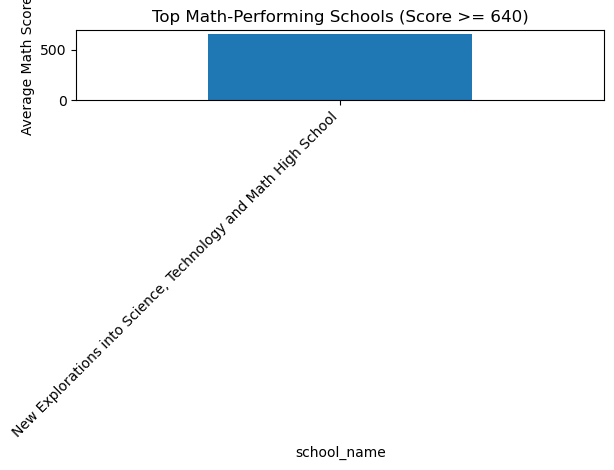

In [8]:
# Visualization: Top Math-Performing Schools
plt.figure(figsize=(10, 6))
best_math_schools.head(10).plot(kind="bar", x="school_name", y="average_math", legend=False)
plt.title("Top Math-Performing Schools (Score >= 640)")
plt.ylabel("Average Math Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Calculate Total SAT and Find Top 10 Schools
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
top_10_schools = schools.sort_values("total_SAT", ascending=False).head(10)[["school_name", "total_SAT"]]
top_10_schools

,school_name,total_SAT
0,"New Explorations into Science, Technology and ...",1859
3,High School for Dual Language and Asian Studies,1529
2,Lower Manhattan Arts Academy,1261
4,Henry Street School for International Studies,1197
1,Essex Street Academy,1193


<Figure size 1000x600 with 0 Axes>

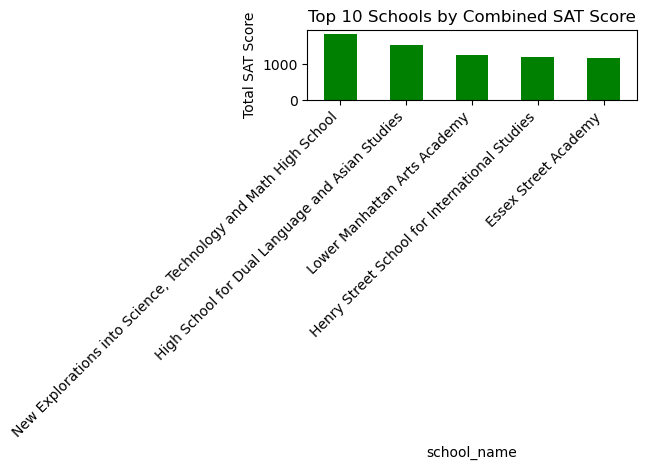

In [10]:
# Visualization: Top 10 Schools by Total SAT
plt.figure(figsize=(10, 6))
top_10_schools.plot(kind="bar", x="school_name", y="total_SAT", legend=False, color="green")
plt.title("Top 10 Schools by Combined SAT Score")
plt.ylabel("Total SAT Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Analyze Borough-Level SAT Score Variability
borough_stats = schools.groupby("borough")["total_SAT"].agg(
    num_schools="count",
    average_SAT="mean",
    std_SAT="std"
).reset_index()
borough_stats[["average_SAT", "std_SAT"]] = borough_stats[["average_SAT", "std_SAT"]].round(2)
borough_stats

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,5,1407.8,287.4


In [12]:
# Borough with Highest Std Dev in SAT
largest_std_dev = borough_stats.sort_values("std_SAT", ascending=False).head(1)
largest_std_dev

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,5,1407.8,287.4


<Figure size 800x500 with 0 Axes>

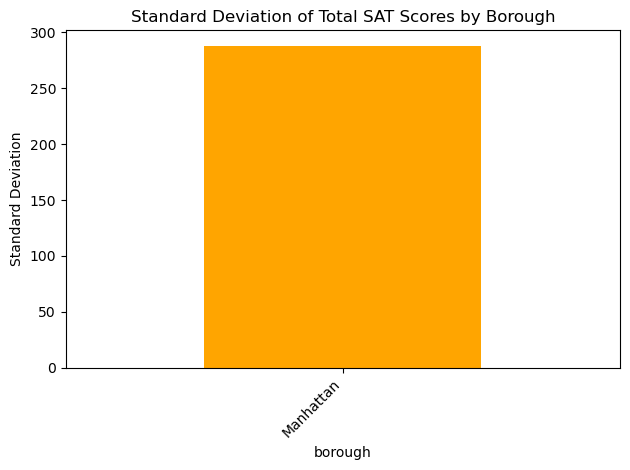

In [13]:
# Visualization: SAT Standard Deviation by Borough
plt.figure(figsize=(8, 5))
borough_stats.sort_values("std_SAT", ascending=False).plot(kind="bar", x="borough", y="std_SAT", legend=False, color="orange")
plt.title("Standard Deviation of Total SAT Scores by Borough")
plt.ylabel("Standard Deviation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()